# Isolation forest classifier

In [47]:
import pandas as pd

df = pd.read_csv("data/datathon_data.csv")  # Load your dataset

df = df.drop(columns=['BELNR'])

In [48]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Define categorical columns
categorical_features = df.columns[:6].tolist()

# Apply Label Encoding to each categorical column
label_encoders = {}  # Store encoders for potential inverse transformation

for col in categorical_features:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    label_encoders[col] = encoder  # Save encoder for later use
df['label'] = df['label'].map({'anomal': 1, 'regular': 0})
# Display first few rows to verify encoding
print(df.head())


   WAERS  BUKRS  KTOSL  PRCTR  BSCHL  HKONT       DMBTR       WRBTR  label
0      5     25     15     86      3      1   280979.60        0.00      0
1      3     12     11     70      0      2   129856.53   243343.00      0
2      3     13      5     14      0      3   957463.97  3183838.41      0
3      6     42     15     89      2      1  2681709.51    28778.00      0
4      7     52      4     13      3      1   910514.49      346.00      0


In [50]:
import numpy as np
from sklearn.preprocessing import StandardScaler


numeric_features = df.columns  # Adjust based on your dataset
df[numeric_features] = df[numeric_features].apply(lambda x: np.log1p(x))

scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])

Many anomaly detection techniques work best when the data follows a Gaussian (normal) distribution. If our features are skewed (i.e., they have long tails in one direction) or are on different scales, these algorithms may struggle to accurately identify normal data points and anomalies. This could lead to normal instances being wrongly flagged as outliers or genuine anomalies being overlooked.

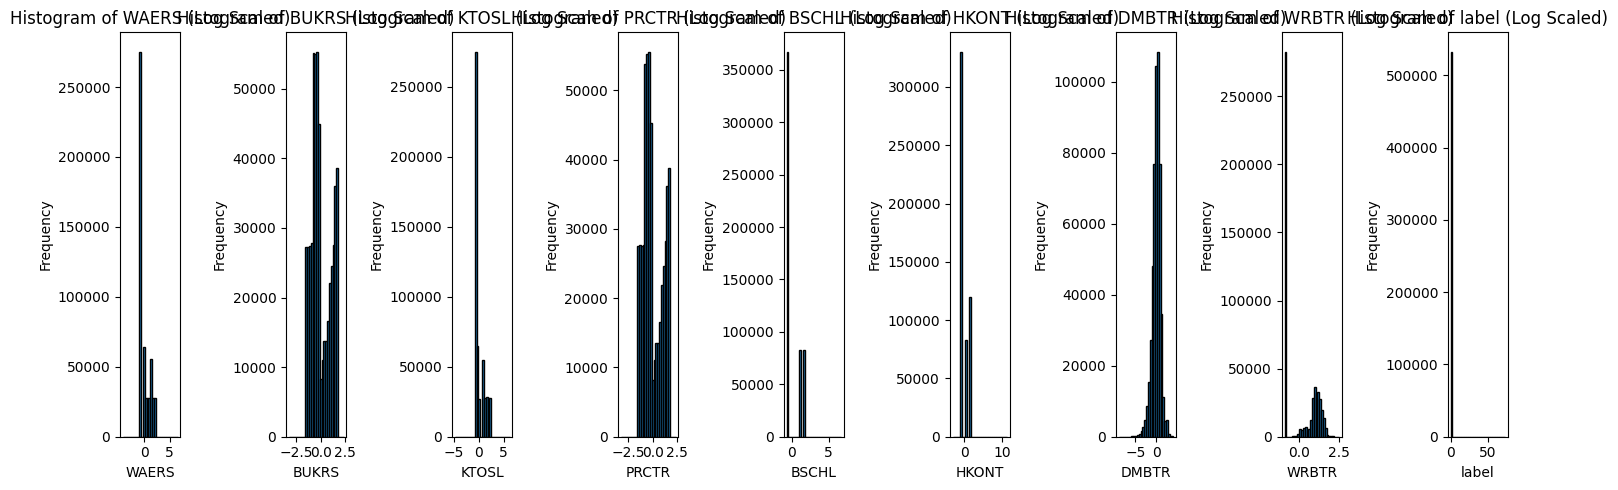

In [51]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, len(numeric_features), figsize=(15, 5))

for i, feature in enumerate(numeric_features):
    axes[i].hist(df[feature], bins=30, edgecolor="black")
    axes[i].set_title(f"Histogram of {feature} (Log Scaled)")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


In [52]:
from sklearn.ensemble import IsolationForest

# Initialize the model
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Train the model
iso_forest.fit(df[numeric_features])

# Predict anomalies (-1 for anomalies, 1 for normal)
iso_preds = iso_forest.predict(df[numeric_features])


In [53]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit_transform(df[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3129138988.py, line 5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


iso_preds = [1 if x == -1 else 0 for x in iso_preds]

y = df['label']

# Evaluate the results
print(classification_report(y, iso_preds))
roc_auc = roc_auc_score(y, iso_preds)
print("ROC AUC Score: ", roc_auc)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    532909
           1       0.00      0.00      0.00       100

    accuracy                           0.95    533009
   macro avg       0.50      0.48      0.49    533009
weighted avg       1.00      0.95      0.97    533009

ROC AUC Score:  0.47500886642935286
